## High-Frequency Trading Data Analysis

### Load Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
symbol = 'AAPL'
data = pd.read_csv(f'../data/{symbol}_intraday.csv')

# Convert the timestamp column to datetime
data['timestamp'] = pd.to_datetime(data['date'])
data.set_index('timestamp', inplace=True)

# Drop unnecessary columns
data.drop(columns=['date'], inplace=True)

# Normalize the close prices
data['close_normalized'] = (data['4. close'] - data['4. close'].mean()) / data['4. close'].std()

### Basic Statistics and Data Overview

In [4]:
# Display basic statistics
data.describe()

,1. open,2. high,3. low,4. close,5. volume,close_normalized
count,20095.000000,20095.000000,20095.000000,20095.000000,2.009500e+04,2.009500e+04
mean,193.107530,193.187024,193.000544,193.107116,7.562590e+04,6.562664e-15
std,5.606416,5.623836,5.666505,5.611676,5.682856e+05,1.000000e+00
min,162.700000,185.790000,158.804000,165.840000,1.000000e+00,-4.858997e+00
25%,190.000000,190.020000,189.980000,190.000000,3.080000e+02,-5.536877e-01
50%,191.570000,191.630000,191.510000,191.570000,3.160000e+03,-2.739139e-01
75%,194.590000,194.670000,194.510000,194.595000,6.698250e+04,2.651408e-01
max,220.090000,220.200000,219.850000,220.082000,4.429414e+07,4.806921e+00


### Time Series Plot of Closing Prices

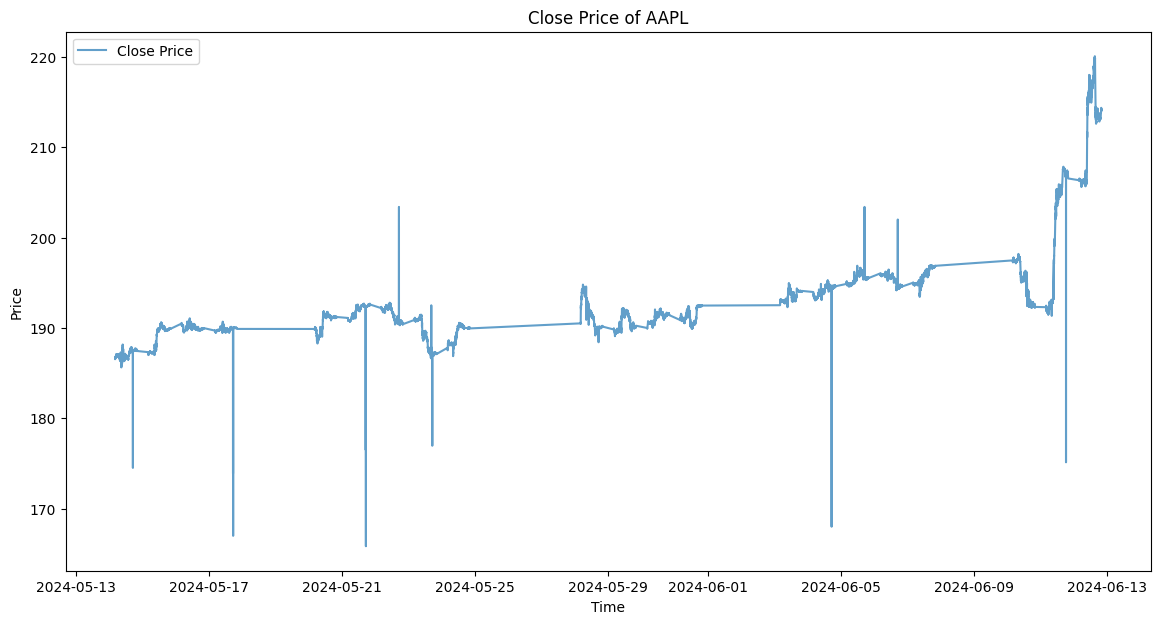

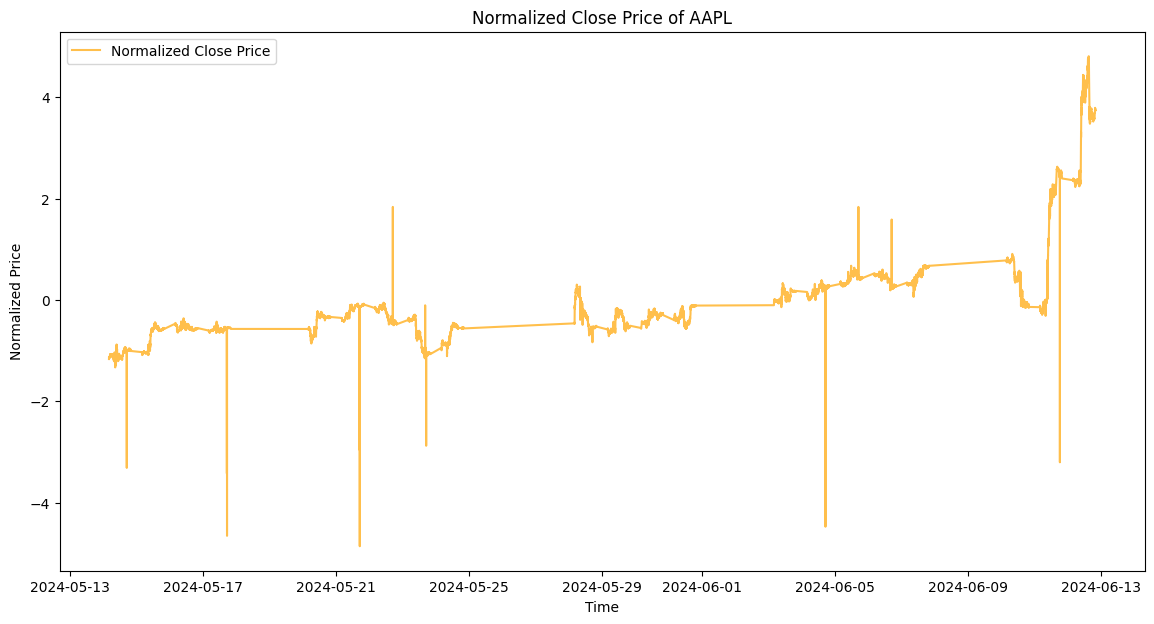

In [10]:
# Plot the raw closing prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['4. close'], label='Close Price', alpha=0.7)
plt.title(f'Close Price of {symbol}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the normalized closing prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['close_normalized'], label='Normalized Close Price', color='orange', alpha=0.7)
plt.title(f'Normalized Close Price of {symbol}')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

### Volume Analysis

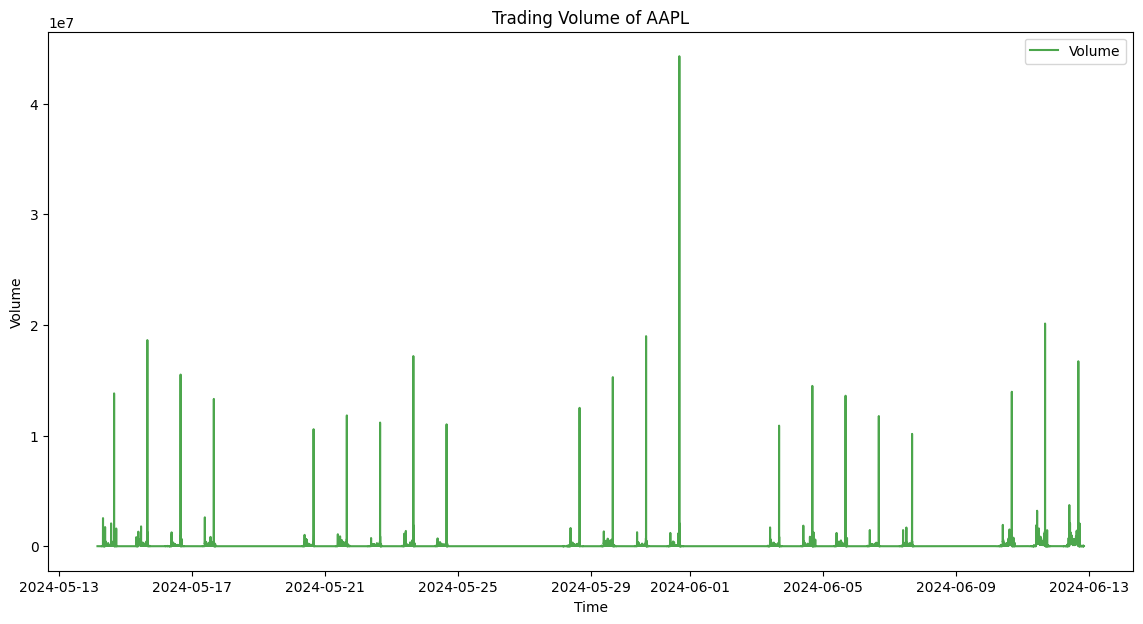

In [11]:
# Plot the trading volume
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['5. volume'], label='Volume', color='green', alpha=0.7)
plt.title(f'Trading Volume of {symbol}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Distribution Analysis

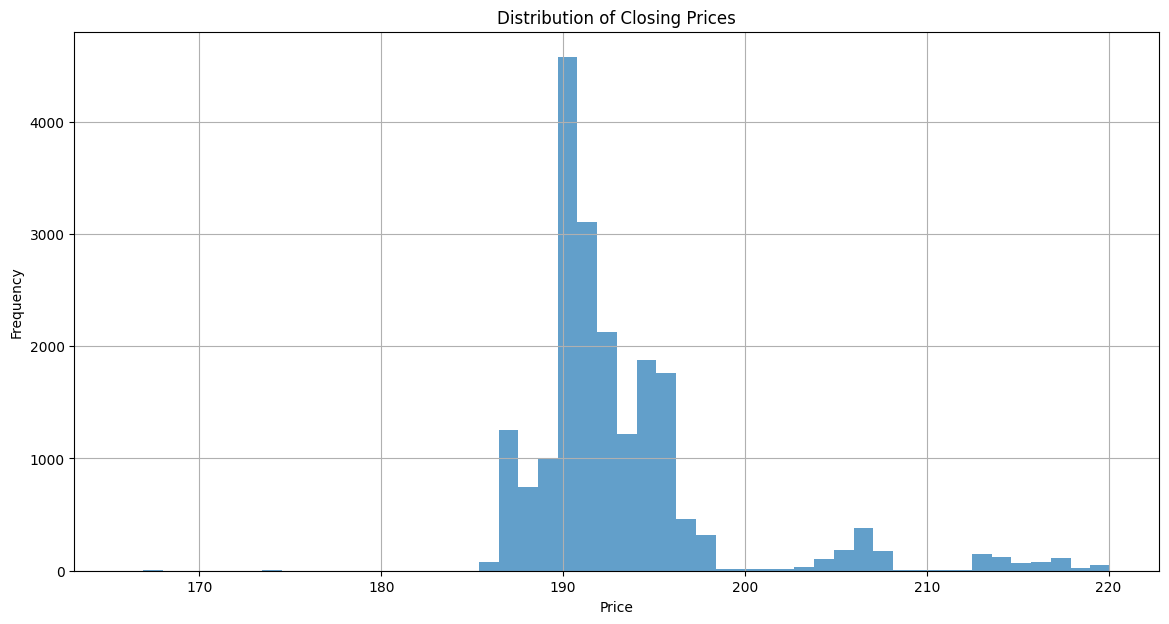

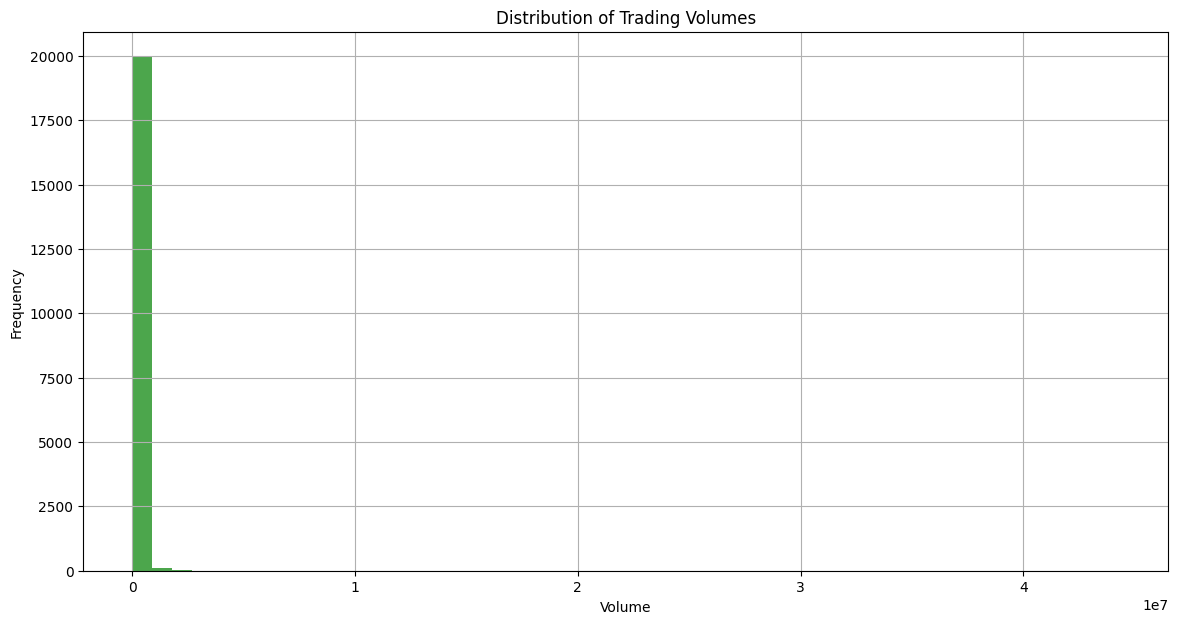

In [12]:
# Distribution of closing prices
plt.figure(figsize=(14, 7))
data['4. close'].hist(bins=50, alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of trading volumes
plt.figure(figsize=(14, 7))
data['5. volume'].hist(bins=50, color='green', alpha=0.7)
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis

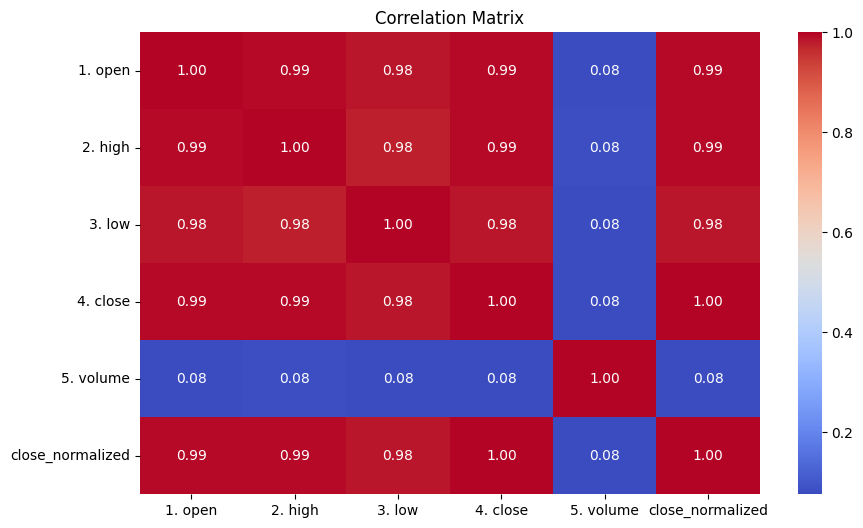

Correlation between close price and volume: 0.07826240771936183
Correlation between high and low prices: 0.9768564216123643


In [14]:
# Correlation matrix
correlation_matrix = data[['1. open', '2. high', '3. low', '4. close', '5. volume', 'close_normalized']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Interpretation
print("Correlation between close price and volume:", correlation_matrix.loc['4. close', '5. volume'])
print("Correlation between high and low prices:", correlation_matrix.loc['2. high', '3. low'])

### Detailed Time Series Analysis

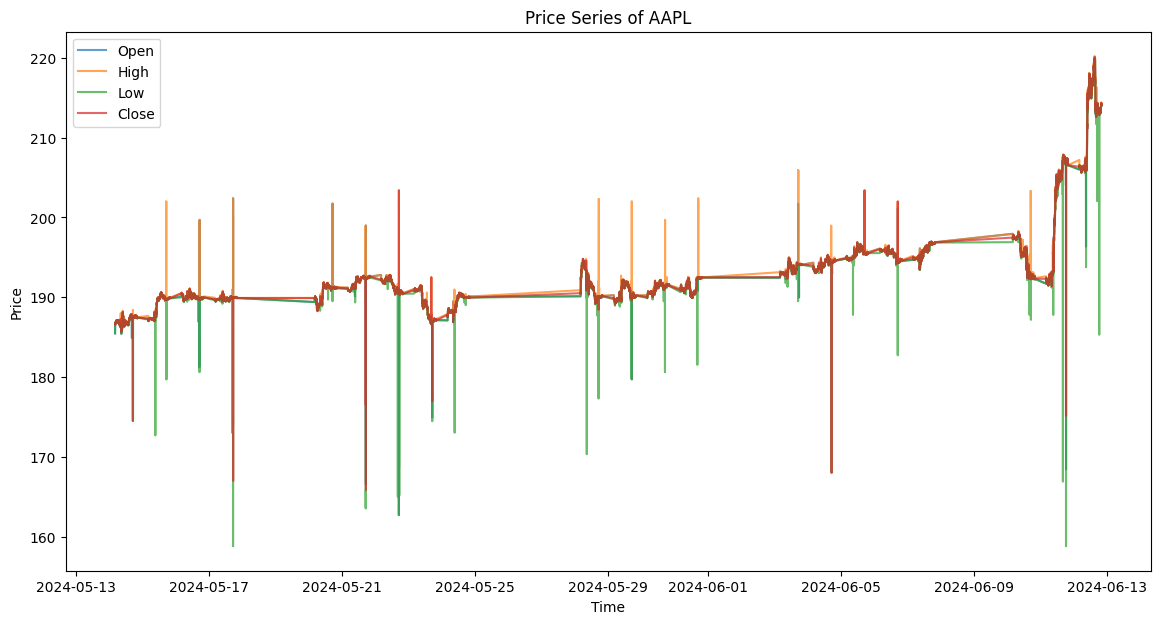

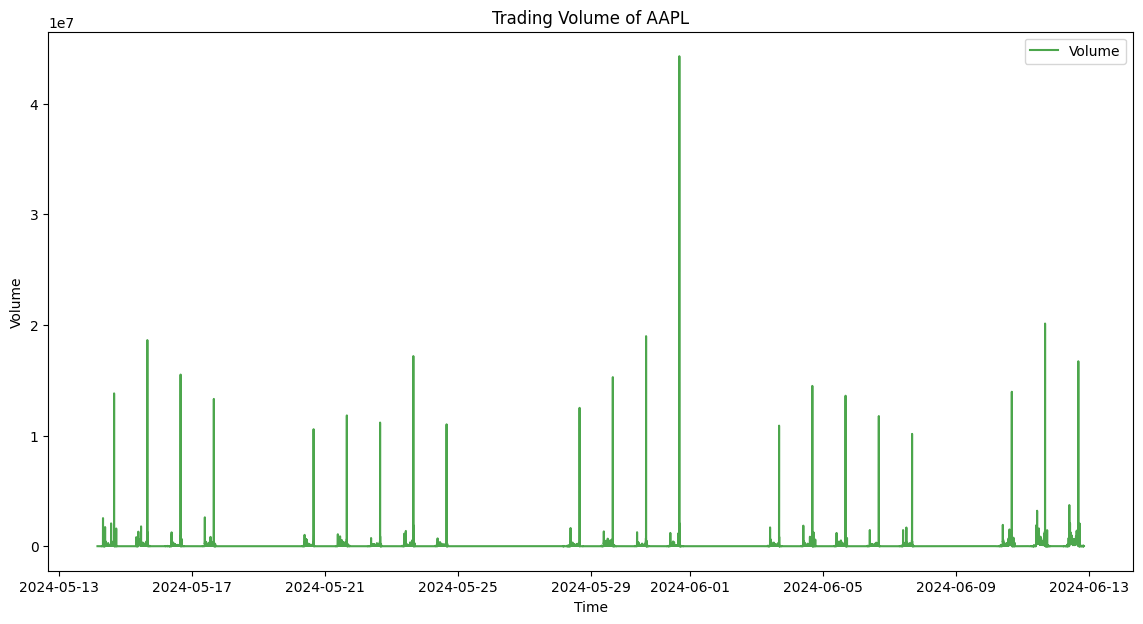

In [15]:
# Plot the time series for open, high, low, close prices and volume
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['1. open'], label='Open', alpha=0.7)
plt.plot(data.index, data['2. high'], label='High', alpha=0.7)
plt.plot(data.index, data['3. low'], label='Low', alpha=0.7)
plt.plot(data.index, data['4. close'], label='Close', alpha=0.7)
plt.title(f'Price Series of {symbol}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['5. volume'], label='Volume', color='green', alpha=0.7)
plt.title(f'Trading Volume of {symbol}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Lagged Correlation Analysis

In [16]:
# Create lagged features for volume
data['volume_lagged_1'] = data['5. volume'].shift(1)
data['volume_lagged_2'] = data['5. volume'].shift(2)

# Calculate correlation with lagged volumes
lagged_correlation_1 = data['4. close'].corr(data['volume_lagged_1'])
lagged_correlation_2 = data['4. close'].corr(data['volume_lagged_2'])

print(f"Lagged Correlation (1 period): {lagged_correlation_1}")
print(f"Lagged Correlation (2 periods): {lagged_correlation_2}")

Lagged Correlation (1 period): 0.07830784098855921
Lagged Correlation (2 periods): 0.07739858478660877


### Volatility Analysis

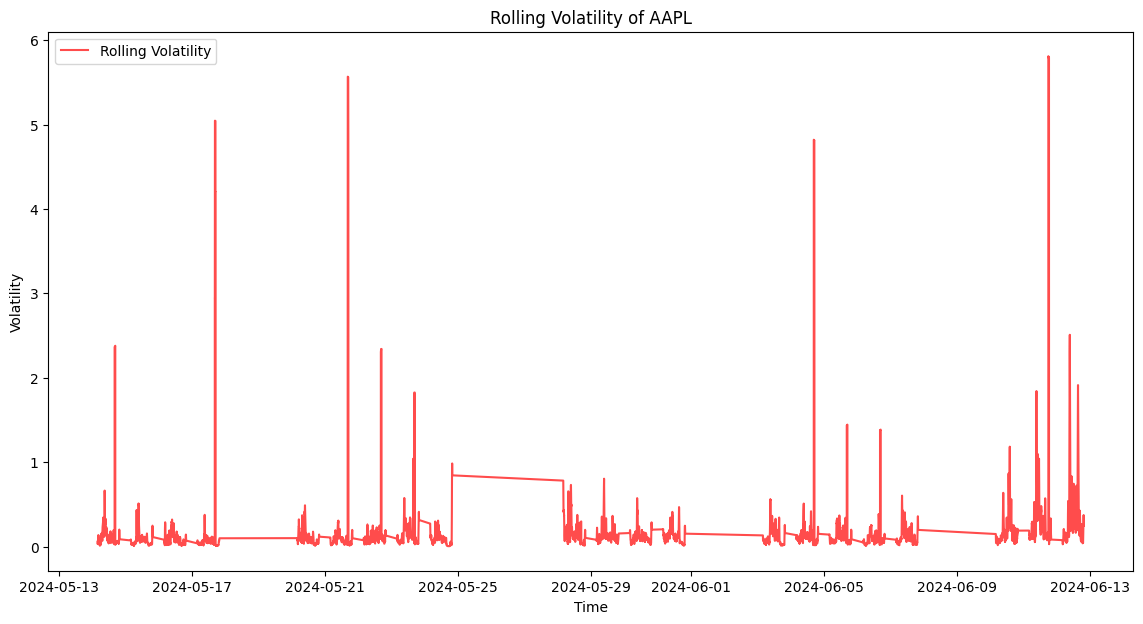

In [17]:
# Calculate rolling volatility (standard deviation)
rolling_window = 30  # 30-period rolling window
data['rolling_volatility'] = data['4. close'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['rolling_volatility'], label='Rolling Volatility', color='red', alpha=0.7)
plt.title(f'Rolling Volatility of {symbol}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

### Price Change and Volume Analysis

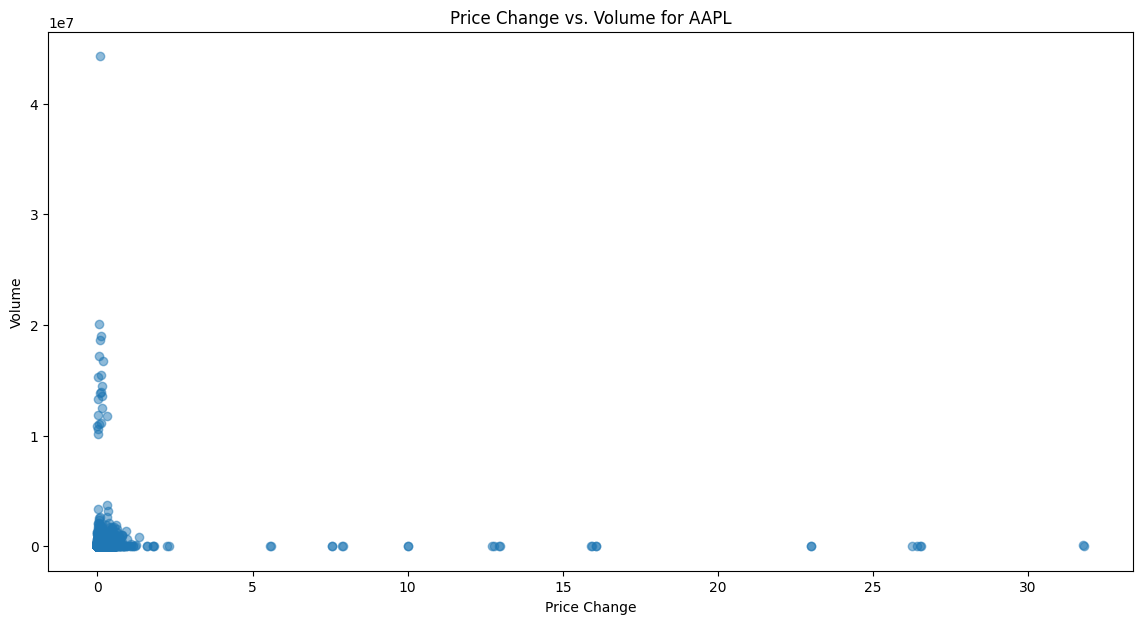

In [23]:
# Calculate absolute price changes
data['price_change'] = data['4. close'].diff().abs()

# Plot price change vs. volume
plt.figure(figsize=(14, 7))
plt.scatter(data['price_change'], data['5. volume'], alpha=0.5)
plt.title(f'Price Change vs. Volume for {symbol}')
plt.xlabel('Price Change')
plt.ylabel('Volume')
plt.show()